<center>

## **MOOC's**
**(Massive - Open - Online -Courses)**<br>
**EDA**<br>
**_PROYECTO INDIVIDUAL 2_**<br>

</center>

**Data Analyst (DA)**<br>
**Data Scientis:** _Ilbert Ferney Alarcon_ 😎<br>
**Cohorte 11**<br>

------------------

## Resumen

En este proyecto, nos enfrentamos al desafío de analizar datos de competidores en el mercado de cursos en línea (MOOCs) para ayudar a una startup de tecnología a ingresar de manera eficiente a este sector. Los MOOCs han ganado popularidad en los últimos años, con plataformas como Udacity, edX y Coursera ofreciendo acceso a contenido educativo de calidad de forma práctica y desde la comodidad del hogar. El objetivo principal es segmentar el nivel de ventas de los cursos en función del precio, idioma, nivel y calificación, con el fin de comprender cómo estas variables influyen en la demanda del producto. Para lograr esto, utilizaremos datasets de competidores para realizar un análisis exhaustivo y extraer conclusiones relevantes.

Al analizar los datos, nos ayudará a determinar qué enfoques y estrategias podrían ser más efectivos para captar y retener clientes en este mercado altamente competitivo. Con estos conocimientos, la startup podrá ajustar su modelo de negocio y contenido de manera más precisa, para maximizar sus oportunidades de éxito en el mercado de cursos online.

Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
import re
import session_info
import ydata_profiling as pp
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px

d:\_DATA SCIENTIST\PI_DA_02\.venv\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
d:\_DATA SCIENTIST\PI_DA_02\.venv\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Importar datos de Datasets procesados en el ETL

In [2]:
coursera_etldf =pd.read_csv(r'DATASETS\_ETL_COUSERA.csv',encoding='utf-8')
coursera_rewetldf =pd.read_csv(r'DATASETS\_ETL_COUSERA_REVIEWS.csv',encoding='utf-8')
edx_etldf=pd.read_csv(r'DATASETS\_ETL_EDX.csv',encoding='utf-8')
udemy_etldf=pd.read_csv(r'DATASETS\_UDEMY_EDX.csv',sep=',', encoding='utf-8')

## Hipotesis de distribucion y correlacion en variables

### Coursera

In [3]:
#pp.ProfileReport(coursera_etldf)

### Coursera Review

In [4]:
#pp.ProfileReport(coursera_rewetldf)

### EDX

In [5]:
#pp.ProfileReport(edx_etldf)

### Udemy

In [6]:
#pp.ProfileReport(udemy_etldf)

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
coursera_etldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_id    623 non-null    object
 3   language     623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [8]:
coursera_rewetldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519946 entries, 0 to 519945
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   reviews       517965 non-null  object
 1   reviewers     519946 non-null  object
 2   date_reviews  519946 non-null  object
 3   rating        519946 non-null  int64 
 4   course_id     519946 non-null  object
dtypes: int64(1), object(4)
memory usage: 19.8+ MB


In [9]:
edx_etldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               948 non-null    object
 1   summary             948 non-null    object
 2   n_enrolled          948 non-null    int64 
 3   course_type         948 non-null    object
 4   institution         948 non-null    object
 5   Level               948 non-null    object
 6   subject             948 non-null    object
 7   language            948 non-null    object
 8   subtitles           948 non-null    object
 9   course_effort       948 non-null    object
 10  course_length       948 non-null    object
 11  price               948 non-null    int64 
 12  course_description  948 non-null    object
dtypes: int64(2), object(11)
memory usage: 96.4+ KB


In [10]:
udemy_etldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3672 non-null   int64  
 1   course_title      3672 non-null   object 
 2   is_paid           3672 non-null   bool   
 3   price             3672 non-null   int64  
 4   num_subscribers   3672 non-null   int64  
 5   num_reviews       3672 non-null   int64  
 6   num_lectures      3672 non-null   int64  
 7   level             3672 non-null   object 
 8   content_duration  3672 non-null   float64
 9   date_published    3672 non-null   object 
 10  subject           3672 non-null   object 
 11  language          3672 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.3+ KB


## ¿Existen valores nulos explícitos en el conjunto de datos?

In [11]:
(coursera_etldf.isnull().sum().sort_values(ascending=False))

name           0
institution    0
course_id      0
language       0
dtype: int64

In [12]:
(coursera_rewetldf.isnull().sum().sort_values(ascending=False))

reviews         1981
reviewers          0
date_reviews       0
rating             0
course_id          0
dtype: int64

In [13]:
(edx_etldf.isnull().sum().sort_values(ascending=False))

title                 0
summary               0
n_enrolled            0
course_type           0
institution           0
Level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
dtype: int64

In [14]:
(udemy_etldf.isnull().sum().sort_values(ascending=False))

course_id           0
course_title        0
is_paid             0
price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
content_duration    0
date_published      0
subject             0
language            0
dtype: int64

## ¿Qué estadísticos describen el conjunto de datos?

### Coursera

Todas las variables

In [15]:
coursera_etldf.describe(include='all')

name                 institution  \
count                          623                         623   
unique                         622                         134   
top     Introduction to Psychology  University of Pennsylvania   
freq                             2                          43   

               course_id language  
count                623      623  
unique               623        7  
top     machine-learning  English  
freq                   1      555

### Coursera Reviews

Todas las variables

In [16]:
coursera_rewetldf.describe(include='all')

reviews     reviewers date_reviews         rating course_id
count   517965        519946       519946  519946.000000    519946
unique  435814        287808         1892            NaN       604
top       good  By Deleted A   2020-05-18            NaN    python
freq      6402          1930         1975            NaN     15226
mean       NaN           NaN          NaN       4.689243       NaN
std        NaN           NaN          NaN       0.710876       NaN
min        NaN           NaN          NaN       1.000000       NaN
25%        NaN           NaN          NaN       5.000000       NaN
50%        NaN           NaN          NaN       5.000000       NaN
75%        NaN           NaN          NaN       5.000000       NaN
max        NaN           NaN          NaN       5.000000       NaN

Variable Numerica

In [17]:
coursera_rewetldf.describe(include=[np.number])

rating
count  519946.000000
mean        4.689243
std         0.710876
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000

### EDX

Todas las variables

In [18]:
edx_etldf.describe(include='all')

title                                         summary  \
count                    948                                             948   
unique                   946                                             914   
top     Marketing Management  This course is part of a MicroMasters® Program   
freq                       2                                              15   
mean                     NaN                                             NaN   
std                      NaN                                             NaN   
min                      NaN                                             NaN   
25%                      NaN                                             NaN   
50%                      NaN                                             NaN   
75%                      NaN                                             NaN   
max                      NaN                                             NaN   

          n_enrolled              course_type         institution  \
count   9.480000e+02                      948                 948   
unique           NaN                        2                 110   
top              NaN  Self-paced on your time  Harvard University   
freq             NaN                      890                 101   
mean    4.737710e+04                      NaN                 NaN   
std     1.142698e+05                      NaN                 NaN   
min     0.000000e+00                      NaN                 NaN   
25%     8.559250e+03                      NaN                 NaN   
50%     1.981650e+04                      NaN                 NaN   
75%     4.932425e+04                      NaN                 NaN   
max     2.442271e+06                      NaN                 NaN   

               Level                subject language subtitles  \
count            948                    948      948       948   
unique             3                     31        9        33   
top     Introductory  Business & Management  English   English   
freq             602                    163      760       699   
mean             NaN                    NaN      NaN       NaN   
std              NaN                    NaN      NaN       NaN   
min              NaN                    NaN      NaN       NaN   
25%              NaN                    NaN      NaN       NaN   
50%              NaN                    NaN      NaN       NaN   
75%              NaN                    NaN      NaN       NaN   
max              NaN                    NaN      NaN       NaN   

             course_effort course_length       price  \
count                  948           948  948.000000   
unique                  53            18         NaN   
top     2–4 hours per week       4 Weeks         NaN   
freq                   104           188         NaN   
mean                   NaN           NaN  101.797468   
std                    NaN           NaN   70.025151   
min                    NaN           NaN    5.000000   
25%                    NaN           NaN   49.000000   
50%                    NaN           NaN   79.000000   
75%                    NaN           NaN  149.000000   
max                    NaN           NaN  450.000000   

                                       course_description  
count                                                 948  
unique                                                935  
top     This course is part of a Professional Certificate  
freq                                                    7  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Udemy

Todas las variables

In [19]:
udemy_etldf.describe(include='all')

course_id                   course_title is_paid        price  \
count   3.672000e+03                           3672    3672  3672.000000   
unique           NaN                           3663       2          NaN   
top              NaN  Acoustic Blues Guitar Lessons    True          NaN   
freq             NaN                              3    3362          NaN   
mean    6.758977e+05                            NaN     NaN    66.102941   
std     3.430720e+05                            NaN     NaN    61.035920   
min     8.324000e+03                            NaN     NaN     0.000000   
25%     4.077615e+05                            NaN     NaN    20.000000   
50%     6.876920e+05                            NaN     NaN    45.000000   
75%     9.608140e+05                            NaN     NaN    95.000000   
max     1.282064e+06                            NaN     NaN   200.000000   

        num_subscribers   num_reviews  num_lectures       level  \
count       3672.000000   3672.000000   3672.000000        3672   
unique              NaN           NaN           NaN           4   
top                 NaN           NaN           NaN  All Levels   
freq                NaN           NaN           NaN        1925   
mean        3190.586874    156.371460     40.140251         NaN   
std         9488.105448    936.178649     50.417102         NaN   
min            0.000000      0.000000      0.000000         NaN   
25%          111.750000      4.000000     15.000000         NaN   
50%          912.000000     18.000000     25.000000         NaN   
75%         2548.750000     67.000000     46.000000         NaN   
max       268923.000000  27445.000000    779.000000         NaN   

        content_duration date_published          subject language  
count        3672.000000           3672             3672     3672  
unique               NaN           1210                4        9  
top                  NaN     2017-05-01  Web Development  English  
freq                 NaN             21             1199     3246  
mean            4.097603            NaN              NaN      NaN  
std             6.057830            NaN              NaN      NaN  
min             0.000000            NaN              NaN      NaN  
25%             1.000000            NaN              NaN      NaN  
50%             2.000000            NaN              NaN      NaN  
75%             4.500000            NaN              NaN      NaN  
max            78.500000            NaN              NaN      NaN

Variable Numerica

In [20]:
udemy_etldf.describe(include=[np.number])

course_id        price  num_subscribers   num_reviews  num_lectures  \
count  3.672000e+03  3672.000000      3672.000000   3672.000000   3672.000000   
mean   6.758977e+05    66.102941      3190.586874    156.371460     40.140251   
std    3.430720e+05    61.035920      9488.105448    936.178649     50.417102   
min    8.324000e+03     0.000000         0.000000      0.000000      0.000000   
25%    4.077615e+05    20.000000       111.750000      4.000000     15.000000   
50%    6.876920e+05    45.000000       912.000000     18.000000     25.000000   
75%    9.608140e+05    95.000000      2548.750000     67.000000     46.000000   
max    1.282064e+06   200.000000    268923.000000  27445.000000    779.000000   

       content_duration  
count       3672.000000  
mean           4.097603  
std            6.057830  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            4.500000  
max           78.500000

## ¿Cómo visualizar los conteos y proporciones?

### Coursera

In [21]:
# Calcular los conteos por idioma
language_counts = coursera_etldf['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

# Definir una paleta de colores predefinida y aplicar transparencia y bordes sólidos
fig = go.Figure(data=[go.Pie(labels=language_counts['language'], values=language_counts['count'],
                             hole=0.8, marker=dict(colors=px.colors.qualitative.Set3,
                                                  line=dict(color='black', width=1)),
                             textinfo='label+percent')])

# Modificar el tamaño de la imagen
fig.update_layout(width=600, height=600)

# Personalizar la posición del título
fig.update_layout(annotations=[dict(text='languages', x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()

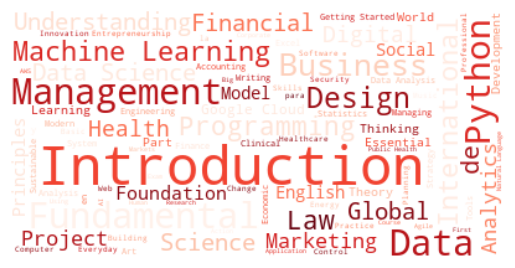

In [22]:
# Crear la WordCloud con fondo blanco y resaltando las palabras más frecuentes
wordcloud = WordCloud(background_color='white', colormap='Reds').generate(' '.join(coursera_etldf['name']))

# Mostrar la WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# Calcular los conteos por institución
institution_counts = coursera_etldf['institution'].value_counts().reset_index()
institution_counts.columns = ['institution', 'count']

# Crear la traza de gráfico de barras
bar_trace = go.Bar(x=institution_counts['institution'], y=institution_counts['count'])

# Crear el diseño del gráfico
layout = go.Layout(
    title='Counts by Institution',
    xaxis=dict(title='Institution'),
    yaxis=dict(title='Count')
)

# Crear la figura que contiene la traza y el diseño
fig = go.Figure(data=[bar_trace], layout=layout)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=800)

# Mostrar la figura
fig.show()

### Coursera Review

In [24]:
# Obtener los valores de la variable 'rating'
ratings = coursera_rewetldf['rating']

# Calcular la moda, mediana y promedio
mode_val = ratings.mode().values[0]
median_val = ratings.median()
mean_val = ratings.mean()

# Crear el histograma
fig = go.Figure(data=[go.Histogram(x=ratings, marker=dict(color='rgba(228,26,28,0.5)'))])

# Obtener el valor máximo de las frecuencias en el histograma
max_freq = np.histogram(ratings)[0].max()

# Agregar las líneas de la moda, mediana y promedio con etiquetas
fig.add_shape(type='line', x0=mode_val, y0=0, x1=mode_val, y1=max_freq, line=dict(color='blue', width=2, dash='dash'), name='Mode')
fig.add_annotation(x=mode_val, y=max_freq, text='Mode', showarrow=False, font=dict(color='blue'))

fig.add_shape(type='line', x0=median_val, y0=0, x1=median_val, y1=max_freq, line=dict(color='green', width=2, dash='dash'), name='Median')
fig.add_annotation(x=median_val, y=max_freq, text='Median', showarrow=False, font=dict(color='green'))

fig.add_shape(type='line', x0=mean_val, y0=0, x1=mean_val, y1=max_freq, line=dict(color='purple', width=2, dash='dash'), name='Mean')
fig.add_annotation(x=mean_val, y=max_freq, text='Mean', showarrow=False, font=dict(color='purple'))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Histogram of Ratings',
    xaxis_title='Rating',
    yaxis_title='Count',
    showlegend=True,
    legend=dict(x=0.8, y=0.95),
    bargap=0.1
)

# Mostrar el histograma
fig.show()

### EDX

In [25]:
# Calcular los conteos por idioma
language_counts = edx_etldf['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

# Definir una paleta de colores predefinida y aplicar transparencia y bordes sólidos
fig = go.Figure(data=[go.Pie(labels=language_counts['language'], values=language_counts['count'],
                             hole=0.8, marker=dict(colors=px.colors.qualitative.Set3,
                                                  line=dict(color='black', width=1)),
                             textinfo='label+percent')])

# Modificar el tamaño de la imagen
fig.update_layout(width=600, height=600)

# Personalizar la posición del título
fig.update_layout(annotations=[dict(text='languages', x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [26]:
# Obtener los valores de la variable 'rating'
ratings = edx_etldf['n_enrolled']

# Calcular la moda, mediana y promedio
mode_val = ratings.mode().values[0]
median_val = ratings.median()
mean_val = ratings.mean()

# Crear el histograma
fig = go.Figure(data=[go.Histogram(x=ratings, marker=dict(color='rgba(228,26,28,0.5)'))])

# Obtener el valor máximo de las frecuencias en el histograma
max_freq = np.histogram(ratings)[0].max()

# Agregar las líneas de la moda, mediana y promedio con etiquetas
fig.add_shape(type='line', x0=mode_val, y0=0, x1=mode_val, y1=max_freq, line=dict(color='blue', width=2, dash='dash'), name='Mode')
fig.add_annotation(x=mode_val, y=max_freq, text='Mode', showarrow=False, font=dict(color='blue'))

fig.add_shape(type='line', x0=median_val, y0=0, x1=median_val, y1=max_freq, line=dict(color='green', width=2, dash='dash'), name='Median')
fig.add_annotation(x=median_val, y=max_freq, text='Median', showarrow=False, font=dict(color='green'))

fig.add_shape(type='line', x0=mean_val, y0=0, x1=mean_val, y1=max_freq, line=dict(color='purple', width=2, dash='dash'), name='Mean')
fig.add_annotation(x=mean_val, y=max_freq, text='Mean', showarrow=False, font=dict(color='purple'))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Histogram of n_enrolled',
    xaxis_title='n_enrolled',
    yaxis_title='Count',
    showlegend=True,
    legend=dict(x=0.8, y=0.95),
    bargap=0.1
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)

# Mostrar el histograma
fig.show()

In [27]:
# Obtener los valores de la variable 'rating'
ratings = edx_etldf['price']

# Calcular la moda, mediana y promedio
mode_val = ratings.mode().values[0]
median_val = ratings.median()
mean_val = ratings.mean()

# Crear el histograma
fig = go.Figure(data=[go.Histogram(x=ratings, marker=dict(color='rgba(228,26,28,0.5)'))])

# Obtener el valor máximo de las frecuencias en el histograma
max_freq = np.histogram(ratings)[0].max()

# Agregar las líneas de la moda, mediana y promedio con etiquetas
fig.add_shape(type='line', x0=mode_val, y0=0, x1=mode_val, y1=max_freq, line=dict(color='blue', width=2, dash='dash'), name='Mode')
fig.add_annotation(x=mode_val, y=max_freq, text='Mode', showarrow=False, font=dict(color='blue'))

fig.add_shape(type='line', x0=median_val, y0=0, x1=median_val, y1=max_freq, line=dict(color='green', width=2, dash='dash'), name='Median')
fig.add_annotation(x=median_val, y=max_freq, text='Median', showarrow=False, font=dict(color='green'))

fig.add_shape(type='line', x0=mean_val, y0=0, x1=mean_val, y1=max_freq, line=dict(color='purple', width=2, dash='dash'), name='Mean')
fig.add_annotation(x=mean_val, y=max_freq, text='Mean', showarrow=False, font=dict(color='purple'))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Histogram of price',
    xaxis_title='price',
    yaxis_title='Count',
    showlegend=True,
    legend=dict(x=0.8, y=0.95),
    bargap=0.1
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)

# Mostrar el histograma
fig.show()

### Udemy

In [28]:

# Calcular los conteos por idioma
language_counts = udemy_etldf['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

# Definir una paleta de colores predefinida y aplicar transparencia y bordes sólidos
fig = go.Figure(data=[go.Pie(labels=language_counts['language'], values=language_counts['count'],
                             hole=0.8, marker=dict(colors=px.colors.qualitative.Set3,
                                                  line=dict(color='black', width=1)),
                             textinfo='label+percent')])

# Modificar el tamaño de la imagen
fig.update_layout(width=600, height=600)

# Personalizar la posición del título
fig.update_layout(annotations=[dict(text='languages', x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [29]:
# Obtener los valores de la variable 'rating'
ratings = udemy_etldf['price']

# Calcular la moda, mediana y promedio
mode_val = ratings.mode().values[0]
median_val = ratings.median()
mean_val = ratings.mean()

# Crear el histograma
fig = go.Figure(data=[go.Histogram(x=ratings, marker=dict(color='rgba(228,26,28,0.5)'))])

# Obtener el valor máximo de las frecuencias en el histograma
max_freq = np.histogram(ratings)[0].max()

# Agregar las líneas de la moda, mediana y promedio con etiquetas
fig.add_shape(type='line', x0=mode_val, y0=0, x1=mode_val, y1=max_freq, line=dict(color='blue', width=2, dash='dash'), name='Mode')
fig.add_annotation(x=mode_val, y=max_freq, text='Mode', showarrow=False, font=dict(color='blue'))

fig.add_shape(type='line', x0=median_val, y0=0, x1=median_val, y1=max_freq, line=dict(color='green', width=2, dash='dash'), name='Median')
fig.add_annotation(x=median_val, y=max_freq, text='Median', showarrow=False, font=dict(color='green'))

fig.add_shape(type='line', x0=mean_val, y0=0, x1=mean_val, y1=max_freq, line=dict(color='purple', width=2, dash='dash'), name='Mean')
fig.add_annotation(x=mean_val, y=max_freq, text='Mean', showarrow=False, font=dict(color='purple'))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Histogram of price',
    xaxis_title='price',
    yaxis_title='Count',
    showlegend=True,
    legend=dict(x=0.8, y=0.95),
    bargap=0.1
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)

# Mostrar el histograma
fig.show()

In [30]:
# Obtener los valores de la variable 'rating'
ratings = udemy_etldf['num_subscribers']

# Calcular la moda, mediana y promedio
mode_val = ratings.mode().values[0]
median_val = ratings.median()
mean_val = ratings.mean()

# Crear el histograma
fig = go.Figure(data=[go.Histogram(x=ratings, marker=dict(color='rgba(228,26,28,0.5)'))])

# Obtener el valor máximo de las frecuencias en el histograma
max_freq = np.histogram(ratings)[0].max()

# Agregar las líneas de la moda, mediana y promedio con etiquetas
fig.add_shape(type='line', x0=mode_val, y0=0, x1=mode_val, y1=max_freq, line=dict(color='blue', width=2, dash='dash'), name='Mode')
fig.add_annotation(x=mode_val, y=max_freq, text='Mode', showarrow=False, font=dict(color='blue'))

fig.add_shape(type='line', x0=median_val, y0=0, x1=median_val, y1=max_freq, line=dict(color='green', width=2, dash='dash'), name='Median')
fig.add_annotation(x=median_val, y=max_freq, text='Median', showarrow=False, font=dict(color='green'))

fig.add_shape(type='line', x0=mean_val, y0=0, x1=mean_val, y1=max_freq, line=dict(color='purple', width=2, dash='dash'), name='Mean')
fig.add_annotation(x=mean_val, y=max_freq, text='Mean', showarrow=False, font=dict(color='purple'))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Histogram of num_subscribers',
    xaxis_title='num_subscribers',
    yaxis_title='Count',
    showlegend=True,
    legend=dict(x=0.8, y=0.95),
    bargap=0.1
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)

# Mostrar el histograma
fig.show()

In [31]:
# Obtener los valores de la variable 'rating'
ratings = udemy_etldf['num_reviews']

# Calcular la moda, mediana y promedio
mode_val = ratings.mode().values[0]
median_val = ratings.median()
mean_val = ratings.mean()

# Crear el histograma
fig = go.Figure(data=[go.Histogram(x=ratings, marker=dict(color='rgba(228,26,28,0.5)'))])

# Obtener el valor máximo de las frecuencias en el histograma
max_freq = np.histogram(ratings)[0].max()

# Agregar las líneas de la moda, mediana y promedio con etiquetas
fig.add_shape(type='line', x0=mode_val, y0=0, x1=mode_val, y1=max_freq, line=dict(color='blue', width=2, dash='dash'), name='Mode')
fig.add_annotation(x=mode_val, y=max_freq, text='Mode', showarrow=False, font=dict(color='blue'))

fig.add_shape(type='line', x0=median_val, y0=0, x1=median_val, y1=max_freq, line=dict(color='green', width=2, dash='dash'), name='Median')
fig.add_annotation(x=median_val, y=max_freq, text='Median', showarrow=False, font=dict(color='green'))

fig.add_shape(type='line', x0=mean_val, y0=0, x1=mean_val, y1=max_freq, line=dict(color='purple', width=2, dash='dash'), name='Mean')
fig.add_annotation(x=mean_val, y=max_freq, text='Mean', showarrow=False, font=dict(color='purple'))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Histogram of num_reviews',
    xaxis_title='num_reviews',
    yaxis_title='Count',
    showlegend=True,
    legend=dict(x=0.8, y=0.95),
    bargap=0.1
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)

# Mostrar el histograma
fig.show()

In [32]:
# Obtener los valores de la variable 'rating'
ratings = udemy_etldf['content_duration']

# Calcular la moda, mediana y promedio
mode_val = ratings.mode().values[0]
median_val = ratings.median()
mean_val = ratings.mean()

# Crear el histograma
fig = go.Figure(data=[go.Histogram(x=ratings, marker=dict(color='rgba(228,26,28,0.5)'))])

# Obtener el valor máximo de las frecuencias en el histograma
max_freq = np.histogram(ratings)[0].max()

# Agregar las líneas de la moda, mediana y promedio con etiquetas
fig.add_shape(type='line', x0=mode_val, y0=0, x1=mode_val, y1=max_freq, line=dict(color='blue', width=2, dash='dash'), name='Mode')
fig.add_annotation(x=mode_val, y=max_freq, text='Mode', showarrow=False, font=dict(color='blue'))

fig.add_shape(type='line', x0=median_val, y0=0, x1=median_val, y1=max_freq, line=dict(color='green', width=2, dash='dash'), name='Median')
fig.add_annotation(x=median_val, y=max_freq, text='Median', showarrow=False, font=dict(color='green'))

fig.add_shape(type='line', x0=mean_val, y0=0, x1=mean_val, y1=max_freq, line=dict(color='purple', width=2, dash='dash'), name='Mean')
fig.add_annotation(x=mean_val, y=max_freq, text='Mean', showarrow=False, font=dict(color='purple'))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Histogram of content_duration',
    xaxis_title='content_duration',
    yaxis_title='Count',
    showlegend=True,
    legend=dict(x=0.8, y=0.95),
    bargap=0.1
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)

# Mostrar el histograma
fig.show()

## Deteccion de Outliers

### ¿Cuál es el rango intercuartílico?

Coursera Review

In [33]:
(
    coursera_rewetldf.quantile(q=[0.75,0.5,0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df:df[0.75]-df[0.25]
    )
)

C:\Users\Alarcon Ilbert\AppData\Local\Temp\ipykernel_11088\3091961241.py:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



variable  0.75  0.5  0.25  iqr
0   rating   5.0  5.0   5.0  0.0

EDX

In [34]:
(
    edx_etldf.quantile(q=[0.75,0.5,0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df:df[0.75]-df[0.25]
    )
)

C:\Users\Alarcon Ilbert\AppData\Local\Temp\ipykernel_11088\2429514969.py:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



variable      0.75      0.5     0.25      iqr
0  n_enrolled  49324.25  19816.5  8559.25  40765.0
1       price    149.00     79.0    49.00    100.0

Udemy

In [35]:
udemy_etldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3672 non-null   int64  
 1   course_title      3672 non-null   object 
 2   is_paid           3672 non-null   bool   
 3   price             3672 non-null   int64  
 4   num_subscribers   3672 non-null   int64  
 5   num_reviews       3672 non-null   int64  
 6   num_lectures      3672 non-null   int64  
 7   level             3672 non-null   object 
 8   content_duration  3672 non-null   float64
 9   date_published    3672 non-null   object 
 10  subject           3672 non-null   object 
 11  language          3672 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.3+ KB


In [36]:
def calculate_iqr(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    return iqr

In [37]:
columns = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
udemy_iqr = {}
for column in columns:
    udemy_iqr[column] = calculate_iqr(udemy_etldf, column)

# Imprimir los resultados
for column, iqr in udemy_iqr.items():
    print(f"IQR de '{column}': {iqr}")

IQR de 'price': 75.0
IQR de 'num_subscribers': 2437.0
IQR de 'num_reviews': 63.0
IQR de 'num_lectures': 31.0
IQR de 'content_duration': 3.5


In [38]:
colors = ['rgba(255, 65, 54, 0.5)']

fig = go.Figure()

fig.add_trace(go.Box(
    x=udemy_etldf['price'],
    orientation='h',
    boxpoints='all',
    jitter=0.2,
    whiskerwidth=0.2,
    fillcolor=colors[0],
    marker=dict(color='rgb(0, 0, 0)'),  # Cambiar color de los puntos
    line=dict(color='rgb(0, 0, 0)', width=2)  # Cambiar color del contorno
))

fig.update_layout(
    title='Box Plot - Distribution of Prices',
    yaxis=dict(title='Price'),
    xaxis=dict(title=''),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)


fig.show()

In [39]:
colors = ['rgba(255, 65, 54, 0.5)']

fig = go.Figure()

fig.add_trace(go.Box(
    x=udemy_etldf['num_subscribers'],
    orientation='h',
    boxpoints='all',
    jitter=0.2,
    whiskerwidth=0.2,
    fillcolor=colors[0],
    marker=dict(color='rgb(0, 0, 0)'),  # Cambiar color de los puntos
    line=dict(color='rgb(0, 0, 0)', width=2)  # Cambiar color del contorno
))

fig.update_layout(
    title='Box Plot - Distribution de num_subscribers',
    yaxis=dict(title='num_subscribers'),
    xaxis=dict(title=''),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)


fig.show()

In [40]:
colors = ['rgba(255, 65, 54, 0.5)']

fig = go.Figure()

fig.add_trace(go.Box(
    x=udemy_etldf['num_reviews'],
    orientation='h',
    boxpoints='all',
    jitter=0.2,
    whiskerwidth=0.2,
    fillcolor=colors[0],
    marker=dict(color='rgb(0, 0, 0)'),  # Cambiar color de los puntos
    line=dict(color='rgb(0, 0, 0)', width=2)  # Cambiar color del contorno
))

fig.update_layout(
    title='Box Plot - Distribution de num_reviews',
    yaxis=dict(title='num_reviews'),
    xaxis=dict(title=''),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)


fig.show()

In [41]:
colors = ['rgba(255, 65, 54, 0.5)']

fig = go.Figure()

fig.add_trace(go.Box(
    x=udemy_etldf['num_lectures'],
    orientation='h',
    boxpoints='all',
    jitter=0.2,
    whiskerwidth=0.2,
    fillcolor=colors[0],
    marker=dict(color='rgb(0, 0, 0)'),  # Cambiar color de los puntos
    line=dict(color='rgb(0, 0, 0)', width=2)  # Cambiar color del contorno
))

fig.update_layout(
    title='Box Plot - Distribution de num_lectures',
    yaxis=dict(title='num_lectures'),
    xaxis=dict(title=''),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)


fig.show()

In [42]:
colors = ['rgba(255, 65, 54, 0.5)']

fig = go.Figure()

fig.add_trace(go.Box(
    x=udemy_etldf['content_duration'],
    orientation='h',
    boxpoints='all',
    jitter=0.2,
    whiskerwidth=0.2,
    fillcolor=colors[0],
    marker=dict(color='rgb(0, 0, 0)'),  # Cambiar color de los puntos
    line=dict(color='rgb(0, 0, 0)', width=2)  # Cambiar color del contorno
))

fig.update_layout(
    title='Box Plot - Distribution de content_duration',
    yaxis=dict(title='content_duration'),
    xaxis=dict(title=''),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

# Modificar el tamaño de la imagen
fig.update_layout(width=1750, height=600)


fig.show()

---------------

# Sesion Info

In [43]:
session_info.show()

In [47]:
coursera_etldf.columns

Index(['name', 'institution', 'course_id', 'language'], dtype='object')

In [48]:
coursera_rewetldf.columns

Index(['reviews', 'reviewers', 'date_reviews', 'rating', 'course_id'], dtype='object')

In [49]:
edx_etldf.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution', 'Level',
       'subject', 'language', 'subtitles', 'course_effort', 'course_length',
       'price', 'course_description'],
      dtype='object')

In [50]:
udemy_etldf.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'date_published', 'subject', 'language'],
      dtype='object')